In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr
/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [2]:
#Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

#Hyperparameter Tuning
from sklearn.model_selection import KFold

#Model Evaluation
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Importing data

In [3]:
# Import dataset
train_dataset_ = pd.read_feather('../input/amexfeather/train_data.ftr')

# Keep the latest statement features for each customer
train_dataset = train_dataset_.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

In [4]:
# Delete gc
del train_dataset_
gc.collect()

68

# Data Visualization 

In [5]:
train_dataset.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,NaN,...,NaN,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,NaN,...,NaN,NaN,0.002981,0.007481,0.007874,NaN,0.003284,0.003170,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,NaN,...,NaN,NaN,0.007381,0.006622,0.000965,NaN,0.002201,0.000834,0.003445,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,NaN,...,NaN,NaN,0.002705,0.006184,0.001899,NaN,0.008186,0.005558,0.002983,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,NaN,...,NaN,NaN,0.002974,0.004162,0.005764,NaN,0.008156,0.006943,0.000905,0


<AxesSubplot:>

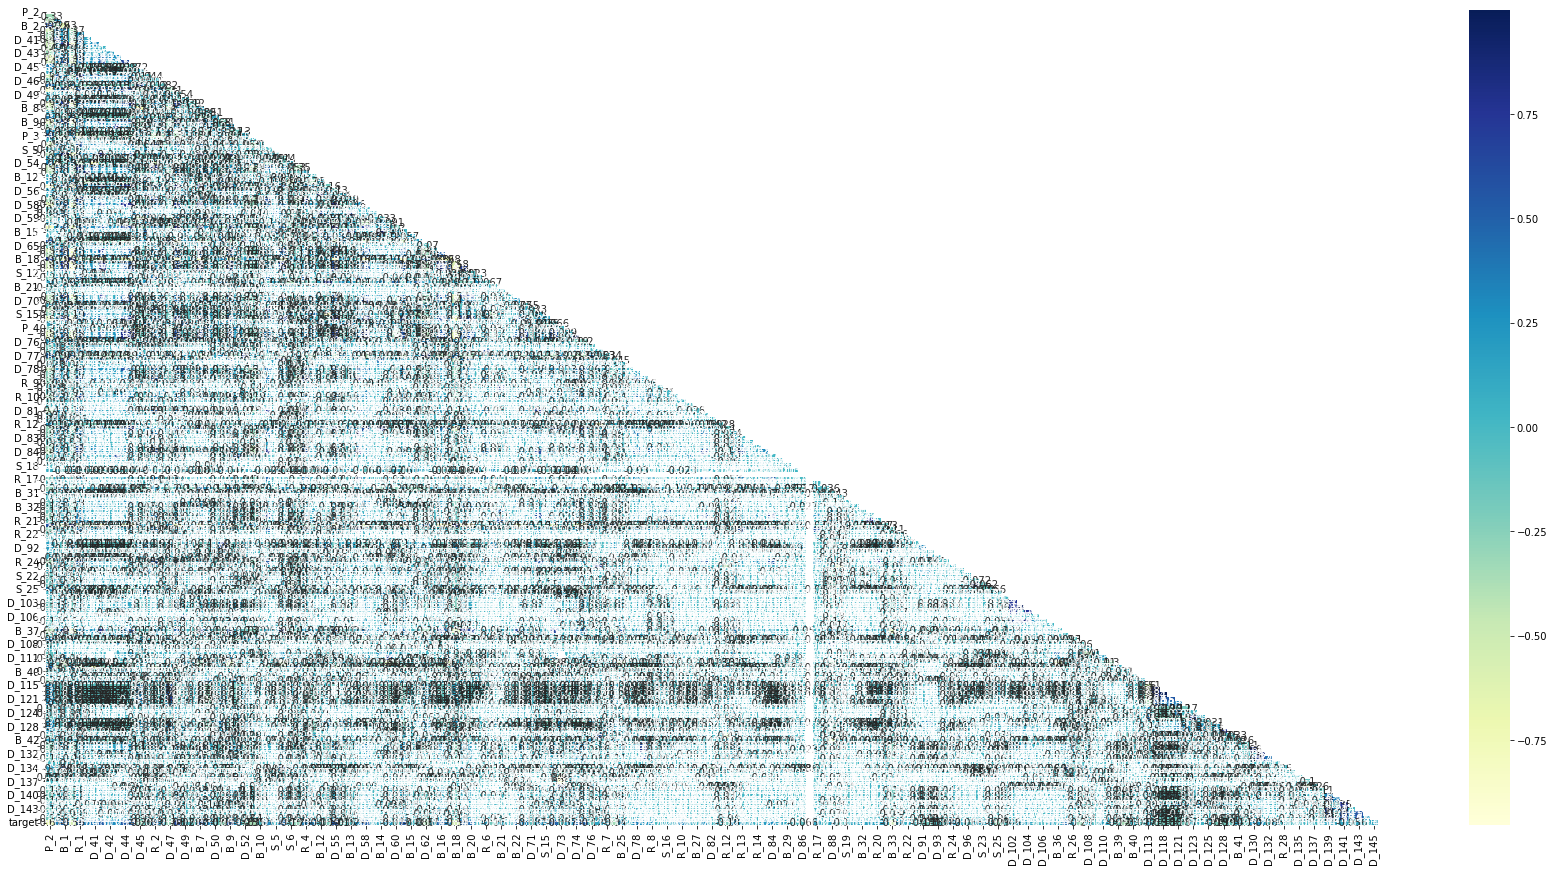

In [6]:
corr= train_dataset.corr()
matrix = np.triu(corr)

plt.figure(figsize=[30,15])
sns.heatmap(corr, annot=True, mask=matrix,cmap="YlGnBu")

In [7]:
# Get train set details
train_dataset.info(max_cols=191,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Data columns (total 190 columns):
 #    Column  Non-Null Count   Dtype         
---   ------  --------------   -----         
 0    S_2     458913 non-null  datetime64[ns]
 1    P_2     455944 non-null  float16       
 2    D_39    458913 non-null  float16       
 3    B_1     458913 non-null  float16       
 4    B_2     458882 non-null  float16       
 5    R_1     458913 non-null  float16       
 6    S_3     373943 non-null  float16       
 7    D_41    458882 non-null  float16       
 8    B_3     458882 non-null  float16       
 9    D_42    59910 non-null   float16       
 10   D_43    324591 non-null  float16       
 11   D_44    436618 non-null  float16       
 12   B_4     458913 non-null  float16       
 13   D_45    458882 non-null  float16       
 14   B_5     458913 non-null  float

# Explore categorical and non categorical features
*     D_* = Delinquency variables (bad or criminal behaviour, especially among young people)
*     S_* = Spend variables
*     P_* = Payment variables
*     B_* = Balance variables
*     R_* = Risk variables

categorical

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [8]:
categorical_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

num_cols = [col for col in train_dataset.columns if col not in categorical_cols + ["target"]]

print(f'Total number of features: {1}')
print(f'Total number of categorical features: {len(categorical_cols)}')
print(f'Total number of continuos features: {len(num_cols)}')

Total number of features: 1
Total number of categorical features: 11
Total number of continuos features: 178


# Visualizing categorial features based on the target

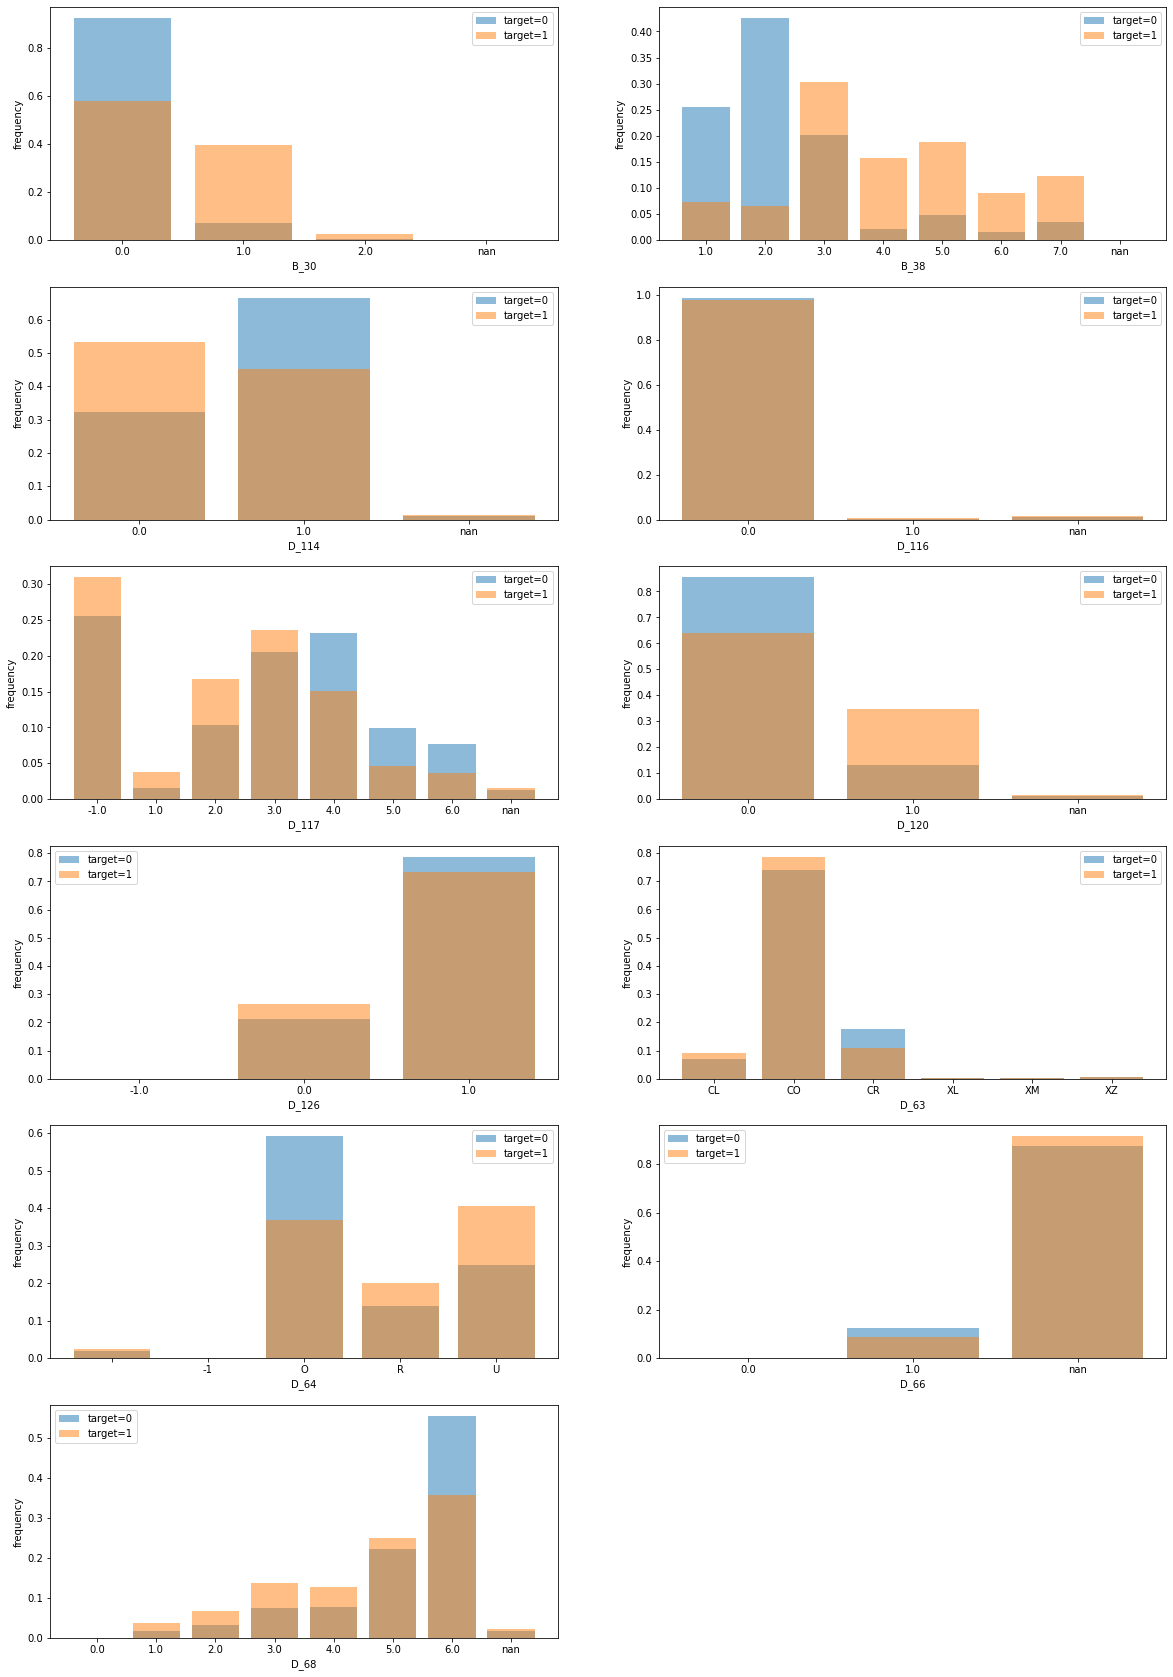

In [9]:
plt.figure(figsize=(20, 30))
for i, f in enumerate(categorical_cols):
    plt.subplot(6, 2, i+1)
    temp = pd.DataFrame(train_dataset[f][train_dataset.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(train_dataset[f][train_dataset.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.show()

# Remove outliers

In [ ]:
from scipy import stats
train_rm_out = train_dataset.copy()
train_rm_out = train_rm_out[(np.abs(stats.zscore(train_x5)) < 3).all(axis=1)]

# Check null values

In [11]:
NaN_Val = np.array(train_dataset.isnull().sum())
NaN_prec = np.array((train_dataset.isnull().sum() * 100 / len(train_dataset)).round(2))
NaN_Col = pd.DataFrame([np.array(list(train_dataset.columns)).T,NaN_Val.T,NaN_prec.T,np.array(list(train_dataset.dtypes)).T], index=['Features','Num of Missing values','Percentage','DataType']
).transpose()
pd.set_option('display.max_rows', None)
NaN_Col

,Features,Num of Missing values,Percentage,DataType
0,S_2,0,0.0,datetime64[ns]
1,P_2,2969,0.65,float16
2,D_39,0,0.0,float16
3,B_1,0,0.0,float16
4,B_2,31,0.01,float16
5,R_1,0,0.0,float16
6,S_3,84970,18.52,float16
7,D_41,31,0.01,float16
8,B_3,31,0.01,float16
9,D_42,399003,86.95,float16


There are many missing values in the dataset

# Drop unuseful columns

In [12]:
train_dataset = train_dataset.drop(['S_2','D_66','D_42','D_49','D_73','D_76','R_9','B_29','D_87','D_88','D_106','R_26','D_108','D_110','D_111','B_39','B_42','D_132','D_134','D_135','D_136','D_137','D_138','D_142'], axis=1)

# Fill null values
In describe session you saw, lot of cloumns means are NaN. So, that's why i have used median to fill NaN values.

In [13]:
selected_col = np.array(['P_2','S_3','B_2','D_41','D_43','B_3','D_44','D_45','D_46','D_48','D_50','D_53','S_7','D_56','S_9','B_6','B_8','D_52','P_3','D_54','D_55','B_13','D_59','D_61','B_15','D_62','B_16','B_17','D_77','B_19','B_20','D_69','B_22','D_70','D_72','D_74','R_7','B_25','B_26','D_78','D_79','D_80','B_27','D_81','R_12','D_82','D_105','S_27','D_83','R_14','D_84','D_86','R_20','B_33','D_89','D_91','S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_107','B_37','R_27','D_109','D_112','B_40','D_113','D_115','D_118','D_119','D_121','D_122','D_123','D_124','D_125','D_128','D_129','B_41','D_130','D_131','D_133','D_139','D_140','D_141','D_143','D_144','D_145'])

for col in selected_col:
    train_dataset[col] = train_dataset[col].fillna(train_dataset[col].median())

In [14]:
selcted_col2 = np.array(['D_68','B_30','B_38','D_64','D_114','D_116','D_117','D_120','D_126'])

for col2 in selcted_col2:
    train_dataset[col2] =  train_dataset[col2].fillna(train_dataset[col2].mode()[0])

# Check again null values

In [15]:
print(train_dataset.isnull().sum().to_string())

P_2       0
D_39      0
B_1       0
B_2       0
R_1       0
S_3       0
D_41      0
B_3       0
D_43      0
D_44      0
B_4       0
D_45      0
B_5       0
R_2       0
D_46      0
D_47      0
D_48      0
B_6       0
B_7       0
B_8       0
D_50      0
D_51      0
B_9       0
R_3       0
D_52      0
P_3       0
B_10      0
D_53      0
S_5       0
B_11      0
S_6       0
D_54      0
R_4       0
S_7       0
B_12      0
S_8       0
D_55      0
D_56      0
B_13      0
R_5       0
D_58      0
S_9       0
B_14      0
D_59      0
D_60      0
D_61      0
B_15      0
S_11      0
D_62      0
D_63      0
D_64      0
D_65      0
B_16      0
B_17      0
B_18      0
B_19      0
B_20      0
D_68      0
S_12      0
R_6       0
S_13      0
B_21      0
D_69      0
B_22      0
D_70      0
D_71      0
D_72      0
S_15      0
B_23      0
P_4       0
D_74      0
D_75      0
B_24      0
R_7       0
D_77      0
B_25      0
B_26      0
D_78      0
D_79      0
R_8       0
S_16      0
D_80      0
R_10      0
R_11

In [16]:
train_dataset.shape

(458913, 166)


# Load Testing DataSet

In [17]:
test_dataset_ = pd.read_feather('../input/amexfeather/test_data.ftr')
# Keep the latest statement features for each customer
test_dataset = test_dataset_.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

Do the same feature enginnering to test dataset

In [18]:
NaN_Val2 = np.array(test_dataset.isnull().sum())
NaN_prec2 = np.array((test_dataset.isnull().sum() * 100 / len(test_dataset)).round(2))
NaN_Col2 = pd.DataFrame([np.array(list(test_dataset.columns)).T,NaN_Val2.T,NaN_prec2.T,np.array(list(test_dataset.dtypes)).T], index=['Features','Num of Missing values','Percentage','DataType']
).transpose()
pd.set_option('display.max_rows', None)

In [19]:
test_dataset = test_dataset.drop(['S_2','D_42','D_49','D_66','D_73','D_76','R_9','B_29','D_87','D_88','D_106','R_26','D_108','D_110','D_111','B_39','B_42','D_132','D_134','D_135','D_136','D_137','D_138','D_142'], axis=1)

In [20]:
selected_column = np.array(['P_2','S_3','B_2','D_41','D_43','B_3','D_44','D_45','D_46','D_48','D_50','D_53','S_7','D_56','S_9','S_12','S_17','B_6','B_8','D_52','P_3','D_54','D_55','B_13','D_59','D_61','B_15','D_62','B_16','B_17','D_77','B_19','B_20','D_69','B_22','D_70','D_72','D_74','R_7','B_25','B_26','D_78','D_79','D_80','B_27','D_81','R_12','D_82','D_105','S_27','D_83','R_14','D_84','D_86','R_20','B_33','D_89','D_91','S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_107','B_37','R_27','D_109','D_112','B_40','D_113','D_115','D_118','D_119','D_121','D_122','D_123','D_124','D_125','D_128','D_129','B_41','D_130','D_131','D_133','D_139','D_140','D_141','D_143','D_144','D_145'])

for column in selected_column:
    test_dataset[column] = test_dataset[column].fillna(test_dataset[column].median())

In [21]:
selected_column2 = np.array(['D_68','B_30','B_38','D_114','D_116','D_117','D_120','D_126'])

for column2 in selected_column2:
    test_dataset[column2] =  test_dataset[column2].fillna(test_dataset[column2].mode()[0])

# Convert categorical variable to numericals

In [22]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
categorical_cols.remove('D_66')

train_dataset[categorical_cols] = enc.fit_transform(train_dataset[categorical_cols])
test_dataset[categorical_cols] = enc.transform(test_dataset[categorical_cols])

# Remove highly correlated features

In [23]:
train_dataset_without_target = train_dataset.drop(["target"],axis=1)

cor_matrix = train_dataset_without_target.corr()
col_core = set()

for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if(cor_matrix.iloc[i, j] > 0.8):
            col_name = cor_matrix.columns[i]
            col_core.add(col_name)
col_core

{'B_11',
 'B_13',
 'B_15',
 'B_18',
 'B_20',
 'B_23',
 'B_33',
 'B_37',
 'D_104',
 'D_107',
 'D_118',
 'D_119',
 'D_131',
 'D_141',
 'D_143',
 'D_55',
 'D_61',
 'D_74',
 'D_75',
 'D_77',
 'R_8',
 'S_24',
 'S_7'}

In [24]:
train_dataset = train_dataset.drop(col_core, axis=1)
test_dataset = test_dataset.drop(col_core, axis=1)

In [25]:
train_dataset.shape

(458913, 143)

In [26]:
num_columns = [col for col in train_dataset.columns if col not in ["target"]]

X = train_dataset[num_columns]
y = train_dataset['target']

print(f"X shape is = {X.shape}" )
print(f"Y shape is = {y.shape}" )

X shape is = (458913, 142)
Y shape is = (458913,)


# PCA

In [27]:
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation

X_df=X.copy()
X_test_df = test_dataset
X_temp = X_df.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X_temp) # standardizing the data

pca = PCA(0.99)
X_pca = pca.fit_transform(X_std) # fit and reduce dimensions
X_pca_test=pca.transform(X_test_df.values)
print(pca.n_components_)

130


# Standardization

This for SVM classification

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Y = scaler.fit_transform(y)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape is = {x_train.shape}" )
print(f"Y_train shape is = {y_train.shape}" )
print(f"X_test shape is = {x_test.shape}" )
print(f"Y_test shape is = {y_test.shape}" )

X_train shape is = (367130, 142)
Y_train shape is = (367130,)
X_test shape is = (91783, 142)
Y_test shape is = (91783,)


# KNeighborsClassifier

In [ ]:
# Find best parameters 
import optuna

def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 4, 15)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return 1 - accuracy_score(y_test, y_pred)

study = optuna.create_study()
study.optimize(objective, n_trials=10)

best_params = study.best_params
print(best_params)

In [ ]:
# Fit the model on the training data
best_clf = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
best_clf.fit(x_train, y_train)

In [ ]:
# Test accuracy
predictions = best_clf.predict(x_test[num_columns])
roc_auc_score(y_test,predictions,average='macro')

In [ ]:
# Make predictions
predictions = best_clf.predict(test_dataset[num_columns])

In [ ]:
# Save predictions of the KNN model to the submission csv

sample_dataset = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')
output = pd.DataFrame({'customer_ID': sample_dataset.customer_ID, 'prediction': predictions})
output.to_csv('submission.csv', index=False)

# SVM Classifier

In [ ]:
# Find best parameters
import optuna

def objective(trial):
    C = trial.suggest_float('C', 0.01, 10.0)
    kernel = trial.suggest_categorical('kernel', ['linear', 'sigmod'])
    clf = SVC(C=C, kernel=kernel)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(roc_auc_score(y_test,y_pred,average='macro'))
    return 1 - accuracy_score(y_test, y_pred)

study = optuna.create_study()
study.optimize(objective, n_trials=10)


best_params = study.best_params
print(best_params)


In [ ]:
# Fit the model on the training data
model_SVM = SVC(C=best_params['C'], kernel=best_params['kernel'])
model_SVM.fit(x_train, y_train)

In [ ]:
# Test accuracy
predictions = model_SVM.predict(x_test[num_columns])
roc_auc_score(y_test,predictions,average='macro')

In [ ]:
# Make predictions
predictions = model_SVM.predict(test_dataset[num_columns])

In [ ]:
# Save predictions of the SVM model to the submission csv

sample_dataset = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')
output = pd.DataFrame({'customer_ID': sample_dataset.customer_ID, 'prediction': predictions})
output.to_csv('submission.csv', index=False)

# XGBClassifier

In [ ]:
# Initialize the XGBClassifier
model_xgbc = XGBClassifier(random_state=3000)

# fit model no training data
model_xgbc.fit(x_train, y_train)

In [ ]:
# Test accuracy
predictions = model_xgbc.predict(x_test[num_columns])
roc_auc_score(y_test,predictions,average='macro')

XGBClassifier - 0.8661767592689054

In [ ]:
# Make predictions
predictions = model_xgbc.predict(test_dataset[num_columns])

In [ ]:
# Save predictions of the XGB Classifier model to the submission csv

sample_dataset = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')
output = pd.DataFrame({'customer_ID': sample_dataset.customer_ID, 'prediction': predictions})
output.to_csv('submission.csv', index=False)

# XGBRegressor

In [ ]:
# Initialize the XGBRegressor
model_xgb = XGBRegressor(n_estimators=1000,learning_rate=0.05)

# fit model no training data
model_xgb.fit(x_train, y_train,early_stopping_rounds=5,eval_set=[(x_train, y_train)], verbose=False)

In [ ]:
# Test accuracy
predictions = model_xgb.predict(x_test[num_columns])
roc_auc_score(y_test,predictions,average='macro')

XGBRegressor - 0.9554931057370848 (without hyper parameter)

XGBRegressor - 0.9580441186365471 (with n_estimators=1000,learning_rate=0.05 and early_stopping_rounds=5,eval_set=[(x_train, y_train)], verbose=False )


In [ ]:
# Make predictions
predictions = model_xgb.predict(test_dataset[num_columns])

In [ ]:
# Save predictions of the XGB Regressor model to the submission csv

sample_dataset = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')
output = pd.DataFrame({'customer_ID': sample_dataset.customer_ID, 'prediction': predictions})
output.to_csv('submission.csv', index=False)

# CatBoostClassifier

In [ ]:
# Initialize the CatBoostClassifier
model_cat = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=10, verbose=False)
# fit model no training data
model_cat.fit(x_train, y_train)

In [ ]:
# Test accuracy
predictions = model_cat.predict(x_test[num_columns])
roc_auc_score(y_test,predictions,average='macro')

In [ ]:
# Make predictions
predictions = model_cat.predict(test_dataset[num_columns])

In [ ]:
# Save predictions of the CatBoostClassifier model to the submission csv

sample_dataset = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')
output = pd.DataFrame({'customer_ID': sample_dataset.customer_ID, 'prediction': predictions})
output.to_csv('submission.csv', index=False)

# LightGBM Classifier 

In [ ]:
# Initialize the LightGBM Classifier
train_lightboost = lgb.Dataset(x_train, label=y_train, categorical_feature = categorical_variables)

params = {'objective': 'binary','n_estimators': 1250,'metric': 'binary_logloss','boosting': 'gbdt','num_leaves': 90,'reg_lambda' : 50,'colsample_bytree': 0.19,'learning_rate': 0.03,'min_child_samples': 2400,'max_bins': 511,'seed': 42,'verbose': -1}

# trained model with 100 iterations
model_lgb = lgb.train(params, train_lightboost, 100)

In [ ]:
# Test accuracy
predictions = model_lgb.predict(x_test[num_columns])
roc_auc_score(y_test,predictions,average='macro')

In [ ]:
# Make predictions
predictions = model_lgb.predict(test_dataset[num_columns])

In [ ]:
# Save predictions of the LightGBM Classifier model to the submission csv

sample_dataset = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')
output = pd.DataFrame({'customer_ID': sample_dataset.customer_ID, 'prediction': predictions})
output.to_csv('submission.csv', index=False)